In [112]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [162]:
covid_table = pd.read_html('https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory')

In [163]:
covid_table

[                                   COVID-19 pandemic  \
 0  Confirmed deaths per 100,000 population, as of...   
 1                                            Disease   
 2                                       Virus strain   
 3                                             Source   
 4                                           Location   
 5                                     First outbreak   
 6                                         Index case   
 7                                               Date   
 8                                    Confirmed cases   
 9                                             Deaths   
 
                                  COVID-19 pandemic.1  
 0  Confirmed deaths per 100,000 population, as of...  
 1                                           COVID-19  
 2                                         SARS-CoV-2  
 3        Probably bats, possibly via pangolins[1][2]  
 4                                          Worldwide  
 5                                 

In [165]:
type(covid_table)

list

In [166]:
len(covid_table)

58

In [167]:
covid_by_location = covid_table[9]
covid_by_location.head(10)

Location[a]                       Cases[b] Deaths[c] Recov.[d]  \
  Unnamed: 0_level_1           World[e] 214,371,702 4,470,302   No data   
0                NaN   United States[f]    38909138    643673   No data   
1                NaN              India    32512366    435758  31754281   
2                NaN             Brazil    20645537    576645  19577135   
3                NaN          Russia[g]     6824540    179243   6092818   
4                NaN          France[h]     6673336    113881   No data   
5                NaN  United Kingdom[i]     6628709    132143   No data   
6                NaN          Turkey[j]     6273681     55212   5756406   
7                NaN       Argentina[k]     5155079    110966   4833260   
8                NaN           Colombia     4897150    124474   4727307   
9                NaN           Spain[l]     4815205     83690   No data   

       Ref.  
        [4]  
0      [27]  
1      [28]  
2  [29][30]  
3      [31]  
4  [32][33]  
5      [35]  
6      [39]  
7      [41]  
8      [42]  
9      [43]

In [168]:
# Column names
covid_by_location.columns

MultiIndex([('Location[a]', 'Unnamed: 0_level_1'),
            ('Location[a]',           'World[e]'),
            (   'Cases[b]',        '214,371,702'),
            (  'Deaths[c]',          '4,470,302'),
            (  'Recov.[d]',            'No data'),
            (       'Ref.',                '[4]')],
           )

In [169]:
# Show all rows in DataFrames
pd.options.display.max_rows = None


In [170]:
covid_by_location

Location[a]  \
                                    Unnamed: 0_level_1   
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
5                                                  NaN   
6                                                  NaN   
7                                                  NaN   
8                                                  NaN   
9                                                  NaN   
10                                                 NaN   
11                                                 NaN   
12                                                 NaN   
13                                                 NaN   
14                                                 NaN   
15                                                 NaN   
16                                                 NaN   
17                                                 NaN   
18                                                 NaN   
19                                                 NaN   
20                                                 NaN   
21                                                 NaN   
22                                                 NaN   
23                                                 NaN   
24                                                 NaN   
25                                                 NaN   
26                                                 NaN   
27                                                 NaN   
28                                                 NaN   
29                                                 NaN   
30                                                 NaN   
31                                                 NaN   
32                                                 NaN   
33                                                 NaN   
34                                                 NaN   
35                                                 NaN   
36                                                 NaN   
37                                                 NaN   
38                                                 NaN   
39                                                 NaN   
40                                                 NaN   
41                                                 NaN   
42                                                 NaN   
43                                                 NaN   
44                                                 NaN   
45                                                 NaN   
46                                                 NaN   
47                                                 NaN   
48                                                 NaN   
49                                                 NaN   
50                                                 NaN   
51                                                 NaN   
52                                                 NaN   
53                                                 NaN   
54                                                 NaN   
55                                                 NaN   
56                                                 NaN   
57                                                 NaN   
58                                                 NaN   
59                                                 NaN   
60                                                 NaN   
61                                                 NaN   
62                                                 NaN   
63                                                 NaN   
64                                                 NaN   
65                                                 NaN   
66                                                 NaN   
67                                       

In [171]:
covid_by_location.columns

MultiIndex([('Location[a]', 'Unnamed: 0_level_1'),
            ('Location[a]',           'World[e]'),
            (   'Cases[b]',        '214,371,702'),
            (  'Deaths[c]',          '4,470,302'),
            (  'Recov.[d]',            'No data'),
            (       'Ref.',                '[4]')],
           )

In [172]:
covid_by_location.drop(columns = [covid_by_location.columns[0], covid_by_location.columns[5] ], inplace = True)
covid_by_location.head(10)

,Location[a],Cases[b],Deaths[c],Recov.[d]
,World[e],"214,371,702","4,470,302",No data
0,United States[f],38909138,643673,No data
1,India,32512366,435758,31754281
2,Brazil,20645537,576645,19577135
3,Russia[g],6824540,179243,6092818
4,France[h],6673336,113881,No data
5,United Kingdom[i],6628709,132143,No data
6,Turkey[j],6273681,55212,5756406
7,Argentina[k],5155079,110966,4833260
8,Colombia,4897150,124474,4727307


In [173]:
covid_by_location.columns = ['location', 'cases', 'deaths', 'recov']
covid_by_location.head(10)

,location,cases,deaths,recov
0,United States[f],38909138,643673,No data
1,India,32512366,435758,31754281
2,Brazil,20645537,576645,19577135
3,Russia[g],6824540,179243,6092818
4,France[h],6673336,113881,No data
5,United Kingdom[i],6628709,132143,No data
6,Turkey[j],6273681,55212,5756406
7,Argentina[k],5155079,110966,4833260
8,Colombia,4897150,124474,4727307
9,Spain[l],4815205,83690,No data


In [174]:
covid_by_location.location.unique()

array(['United States[f]', 'India', 'Brazil', 'Russia[g]', 'France[h]',
       'United Kingdom[i]', 'Turkey[j]', 'Argentina[k]', 'Colombia',
       'Spain[l]', 'Iran', 'Italy', 'Indonesia', 'Germany[m]', 'Mexico',
       'Poland', 'South Africa', 'Ukraine[n]', 'Peru', 'Netherlands[o]',
       'Philippines', 'Iraq', 'Czech Republic', 'Malaysia', 'Chile[p]',
       'Bangladesh', 'Canada[q]', 'Japan[r]', 'Belgium[s]', 'Pakistan',
       'Thailand', 'Sweden', 'Romania', 'Portugal', 'Israel[t]',
       'Morocco[u]', 'Hungary', 'Jordan', 'Switzerland[v]', 'Kazakhstan',
       'Nepal', 'Serbia[w]', 'United Arab Emirates', 'Austria', 'Tunisia',
       'Cuba[x]', 'Lebanon', 'Greece', 'Saudi Arabia', 'Georgia[y]',
       'Ecuador', 'Bolivia', 'Belarus', 'Paraguay', 'Panama',
       'Costa Rica', 'Guatemala', 'Bulgaria', 'Sri Lanka', 'Kuwait',
       'Azerbaijan[z]', 'Slovakia', 'Vietnam', 'Uruguay', 'Myanmar',
       'Croatia', 'Dominican Republic', 'Denmark[aa]', 'Ireland',
       'Honduras', '

In [175]:
covid_by_location.recov.unique()

array(['No data', '31754281', '19577135', '6092818', '5756406', '4833260',
       '4727307', '4020844', '4237758', '3669966', '3706054', '2607633',
       '2656507', '2485108', '2203429', '2115377', '1734551', '1695241',
       '1645971', '1359791', '1592707', '1397885', '1427827', '1118466',
       '1022847', '943784', '1053091', '965324', '942943', '757268',
       '774600', '770192', '317600', '641249', '705893', '697419',
       '657013', '603018', '565116', '549114', '530917', '468917',
       '443880', '429995', '467836', '435771', '438725', '361094',
       '387377', '403292', '351069', '403420', '353140', '188488',
       '377065', '311952', '360054', '339881', '323603', '106085',
       '315617', '314367', '291039', '271819', '216146', '278131',
       '236539', '269572', '256283', '212871', '225234', '216771',
       '228327', '192218', '199434', '183970', '169382', '168012',
       '153148', '109626', '88952', '140350', '144304', '130265',
       '132086', '137253', '132636'

In [176]:
covid_by_location.tail()

,location,cases,deaths,recov
240,Kiribati,2,0,0
241,Palau,2,0,0
242,Federated States of Micronesia,2,0,1
243,As of 26 August 2021 (UTC) · History of cases ...,As of 26 August 2021 (UTC) · History of cases ...,As of 26 August 2021 (UTC) · History of cases ...,As of 26 August 2021 (UTC) · History of cases ...
244,Notes.mw-parser-output .reflist{font-size:90%;...,Notes.mw-parser-output .reflist{font-size:90%;...,Notes.mw-parser-output .reflist{font-size:90%;...,Notes.mw-parser-output .reflist{font-size:90%;...


In [177]:
# ignore last two rows
covid_by_loc = covid_by_location.copy()
covid_by_loc = covid_by_loc.iloc[0:243]
covid_by_loc.tail()

,location,cases,deaths,recov
238,Samoa,3,0,1
239,Vanuatu,3,0,3
240,Kiribati,2,0,0
241,Palau,2,0,0
242,Federated States of Micronesia,2,0,1


In [178]:
covid_by_loc.head()

,location,cases,deaths,recov
0,United States[f],38909138,643673,No data
1,India,32512366,435758,31754281
2,Brazil,20645537,576645,19577135
3,Russia[g],6824540,179243,6092818
4,France[h],6673336,113881,No data


In [189]:
covid_by_loc.deaths.unique()

array(['643673', '435758', '576645', '179243', '113881', '132143',
       '55212', '110966', '124474', '83690', '104022', '128914', '130182',
       '92585', '255452', '75332', '80826', '53566', '198031', '17982',
       '32728', '20480', '30393', '15211', '36778', '25729', '26856',
       '15737', '25348', '25320', '10587', '14682', '34471', '17689',
       '6929', '12176', '30056', '10350', '10474', '8758', '10638',
       '7240', '2031', '10772', '22932', '4902', '8031', '13487', '8512',
       '7028', '32134', '18350', '3723', '15633', '7023', '5394', '11615',
       '18613', '7948', '2414', '5434', '12547', '9667', '6022', '14850',
       '8316', '4006', '2568', '5092', '8751', '3657', '3940', '4049',
       '4606', '4126', '4513', '16691', '1388', '6384', '4442', '2257',
       '4785', '4635', '601', '9770', '3587', '884', '5096', '2288',
       '2503', '5755', '7101', '814', '2171', '1043', '1825', '2486',
       '2571', '1285', '2786', '3361', '4338', '1018', '2973', '982',
   

In [192]:
# clean deaths columns
covid_by_loc.deaths = covid_by_loc.deaths.str.replace("+", "", regex=False)

In [193]:
covid_by_loc.cases.unique()

array(['38909138', '32512366', '20645537', '6824540', '6673336',
       '6628709', '6273681', '5155079', '4897150', '4815205', '4796377',
       '4502396', '4043736', '3923400', '3271128', '2887485', '2734973',
       '2278171', '2145051', '1929018', '1899200', '1855781', '1678331',
       '1640843', '1635958', '1482628', '1480602', '1362813', '1173108',
       '1140411', '1139571', '1122139', '1093924', '1028421', '1025336',
       '836494', '811517', '793182', '768001', '761249', '754915',
       '751147', '713402', '681617', '651035', '619672', '596854',
       '573605', '543318', '532171', '499631', '488403', '474403',
       '458116', '454330', '450291', '450150', '446698', '412370',
       '409009', '405542', '394446', '392938', '384392', '383514',
       '371623', '348566', '339580', '344195', '332832', '332609',
       '328550', '301784', '301713', '300455', '296096', '286938',
       '271933', '266314', '264141', '243317', '239739', '232869',
       '231793', '211689', '205315

In [181]:
covid_by_loc.location

0                                  United States[f]
1                                             India
2                                            Brazil
3                                         Russia[g]
4                                         France[h]
5                                 United Kingdom[i]
6                                         Turkey[j]
7                                      Argentina[k]
8                                          Colombia
9                                          Spain[l]
10                                             Iran
11                                            Italy
12                                        Indonesia
13                                       Germany[m]
14                                           Mexico
15                                           Poland
16                                     South Africa
17                                       Ukraine[n]
18                                             Peru
19          

In [195]:
# Clean location column
covid_by_loc.location = covid_by_loc.location.str.replace(r"\[[a-z]]", '', regex=True)
covid_by_loc.head()

,location,cases,deaths,recov
0,United States,38909138,643673,No data
1,India,32512366,435758,31754281
2,Brazil,20645537,576645,19577135
3,Russia,6824540,179243,6092818
4,France,6673336,113881,No data


In [183]:
covid_by_loc.location

0                                     United States
1                                             India
2                                            Brazil
3                                            Russia
4                                            France
5                                    United Kingdom
6                                            Turkey
7                                         Argentina
8                                          Colombia
9                                             Spain
10                                             Iran
11                                            Italy
12                                        Indonesia
13                                          Germany
14                                           Mexico
15                                           Poland
16                                     South Africa
17                                          Ukraine
18                                             Peru
19          

In [184]:
covid_by_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  243 non-null    object
 1   cases     243 non-null    object
 2   deaths    243 non-null    object
 3   recov     243 non-null    object
dtypes: object(4)
memory usage: 7.7+ KB


In [205]:
# Clean location recov column
covid_by_loc.recov = covid_by_loc.recov.str.lower().str.replace("no data", "0", regex=False)

In [209]:
# change column types
covid_by_loc = covid_by_loc.astype({'cases':'int64', 'deaths':'int64', 'recov':'int64'})
covid_by_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  243 non-null    object
 1   cases     243 non-null    int64 
 2   deaths    243 non-null    int64 
 3   recov     243 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.7+ KB


In [210]:
covid_by_loc.head()

,location,cases,deaths,recov
0,United States,38909138,643673,0
1,India,32512366,435758,31754281
2,Brazil,20645537,576645,19577135
3,Russia,6824540,179243,6092818
4,France,6673336,113881,0


In [211]:
covid_by_loc.set_index('location', inplace =True)
covid_by_loc.head()

,cases,deaths,recov
location,,,
United States,38909138,643673,0
India,32512366,435758,31754281
Brazil,20645537,576645,19577135
Russia,6824540,179243,6092818
France,6673336,113881,0


<AxesSubplot:title={'center':'Top 10 countries with most covid cases'}, xlabel='location', ylabel='number of cases'>

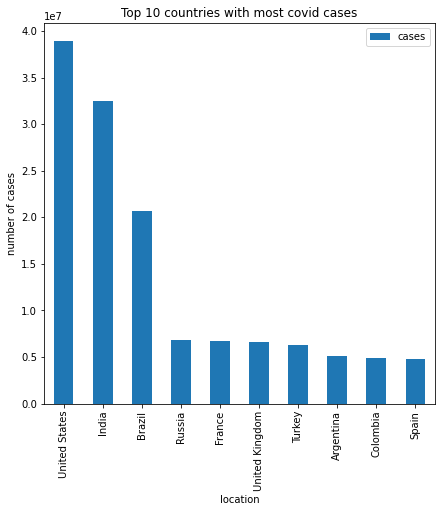

In [215]:
covid_by_loc.iloc[0:10].plot.bar(y = 'cases', figsize=(7,7), title = 'Top 10 countries with most covid cases', ylabel='number of cases')


In [219]:
covid_by_loc.columns

Index(['cases', 'deaths', 'recov'], dtype='object')

<AxesSubplot:title={'center':'Top 10 countries with most deaths'}, xlabel='location', ylabel='number of deaths'>

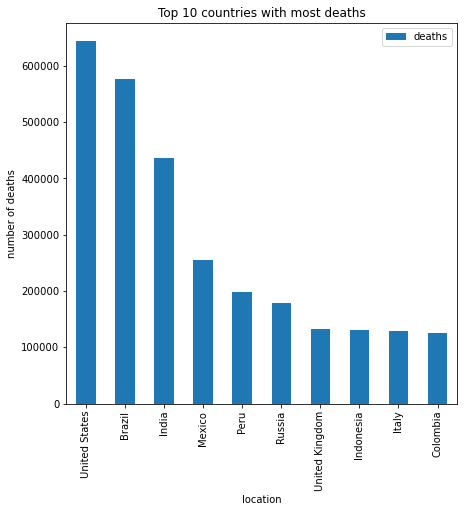

In [223]:
# Need to order it
covid_by_loc.sort_values(by =['deaths'], ascending=False)\
.iloc[0:10].plot.bar(y = 'deaths', figsize=(7,7), title = 'Top 10 countries with most deaths', ylabel='number of deaths')


covid_by_location_by_specific_date =covid_table[11]
covid_by_location_by_specific_date.head(10)

covid_2020 = covid_table[13]
covid_2020.head(10)

In [235]:
# Cumulative COVID-19 deaths at the start of each month
covid_2021 = covid_table[14]
covid_2021.head(10)

,2021,Jan 1,Feb 1,Mar 1,Apr 1,May 1,Jun 1,Jul 1,Aug 1
0,World,1808152,2222810,2529720,2808835,3173576,3663570,3946801,4219945
1,Days to double,112,105,113,130,143,154,172,195
2,Countries and territories,198,204,204,207,208,209,210,210
3,USA,335789,436051,508584,545887,569722,588756,599412,608111
4,Brazil,193875,223945,254221,317646,401186,461931,515985,555460
5,India,148994,154392,157157,162927,211853,331895,399459,424351
6,Mexico,124897,158074,185257,202633,216447,223507,232803,240456
7,Peru,37621,40857,46299,51801,61101,183879,192331,196291
8,Russia,57555,73619,86455,99233,110520,121873,135886,159352
9,UK,73512,106158,122849,126713,127517,127782,128140,129654


In [237]:
covid_df_2021 = covid_2021.iloc[3:].copy()
covid_df_2021.head()

,2021,Jan 1,Feb 1,Mar 1,Apr 1,May 1,Jun 1,Jul 1,Aug 1
3,USA,335789,436051,508584,545887,569722,588756,599412,608111
4,Brazil,193875,223945,254221,317646,401186,461931,515985,555460
5,India,148994,154392,157157,162927,211853,331895,399459,424351
6,Mexico,124897,158074,185257,202633,216447,223507,232803,240456
7,Peru,37621,40857,46299,51801,61101,183879,192331,196291


In [238]:
covid_df_2021.columns = ['country', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
covid_df_2021.head()

,country,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug
3,USA,335789,436051,508584,545887,569722,588756,599412,608111
4,Brazil,193875,223945,254221,317646,401186,461931,515985,555460
5,India,148994,154392,157157,162927,211853,331895,399459,424351
6,Mexico,124897,158074,185257,202633,216447,223507,232803,240456
7,Peru,37621,40857,46299,51801,61101,183879,192331,196291


In [245]:
covid_df_2021.iloc[0].values[1:]

array([335789, 436051, 508584, 545887, 569722, 588756, 599412, 608111],
      dtype=object)

In [242]:
covid_df_2021.columns[1:]

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'], dtype='object')

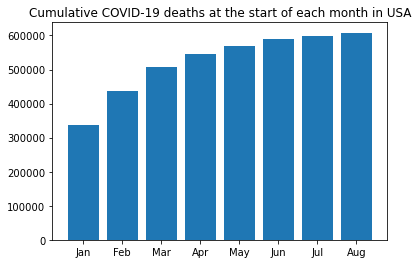

In [249]:
# Cumulative COVID-19 deaths at the start of each month
plt.bar(x = covid_df_2021.columns[1:], height = covid_df_2021.iloc[0].values[1:])
plt.title("Cumulative COVID-19 deaths at the start of each month in USA")
plt.show()